In [19]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [20]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [21]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df['is_male'] = 1
for i in range(len(df)):
    if df.loc[i,'Genre'] == 'Female' :
        df.loc[i,'is_male'] = 0

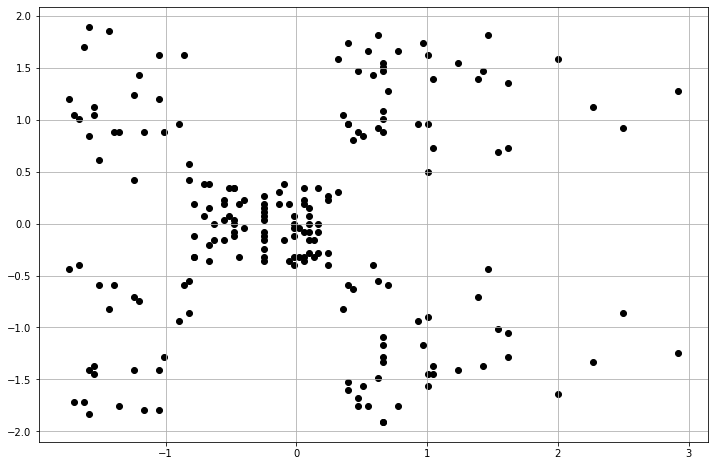

In [24]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
df_scaled = pd.DataFrame(scaller.fit_transform(df[['Age',"Annual Income (k$)",'Spending Score (1-100)','is_male']].astype(float)))
df_scaled.columns = ['Age',"Annual Income (k$)",'Spending Score (1-100)','is_male']
plt.scatter(df_scaled['Annual Income (k$)'],
           df_scaled['Spending Score (1-100)'],
           c='black',
           marker='o')
plt.grid()
plt.show()

In [25]:
X = df_scaled

* define function plot_dendogram

In [26]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

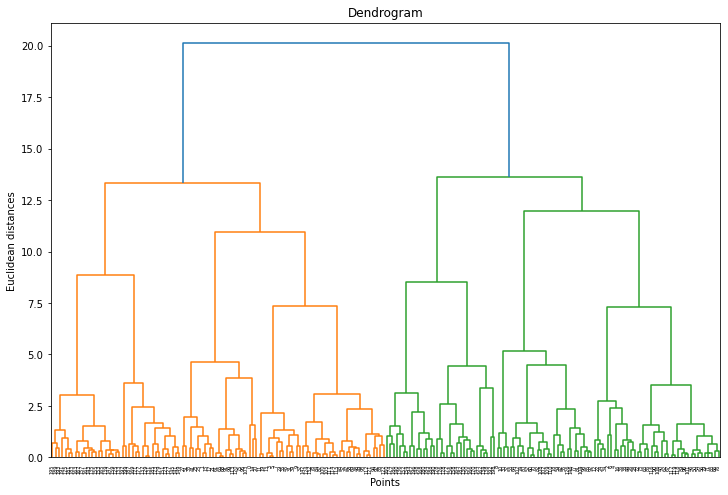

In [27]:
# Plot dendrogram
plot_dendrogram(X)

* Fit Hierarchical clustering with optimal number of clusters

In [31]:
ac = AgglomerativeClustering(affinity='euclidean',
                            linkage='ward',
                            n_clusters = 2)
y_hc = ac.fit_predict(X)

* define function plot_clusters

In [32]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = []
        y = []
        for i in range(len(X)):
            if y_res[i] == cluster:
                x.append(X.loc[i,'Annual Income (k$)'])
                y.append(X.loc[i,'Spending Score (1-100)'])
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

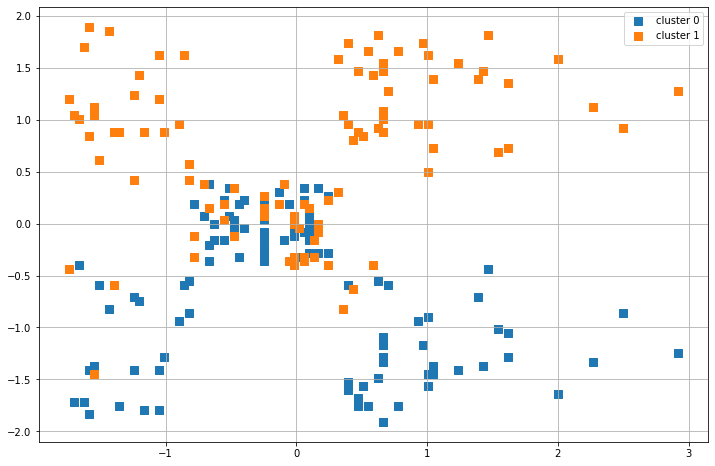

In [33]:
plot_clusters(X,y_hc)